## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
ins=pd.read_csv('Medical_insurance (1).csv')
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [3]:
ins.shape

(2772, 7)

In [4]:
ins.sample(5)

,age,sex,bmi,children,smoker,region,charges
485,31,female,31.065,0,no,northeast,4347.02335
159,50,female,27.830,3,no,southeast,19749.38338
1498,37,male,30.800,0,no,southwest,4646.75900
2296,22,male,28.310,1,no,northwest,2639.04290
2030,43,male,35.310,2,no,southeast,18806.14547


## Exploratory Data Analysis

In [5]:
ins.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

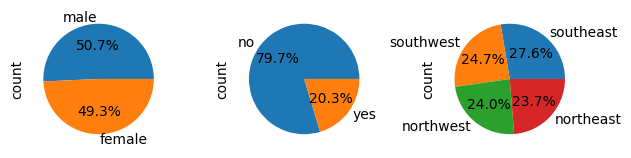

In [6]:
for i, column in enumerate(['sex','smoker','region'], 1):
    plt.subplot(1, 3, i)
    ins[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()
plt.show()

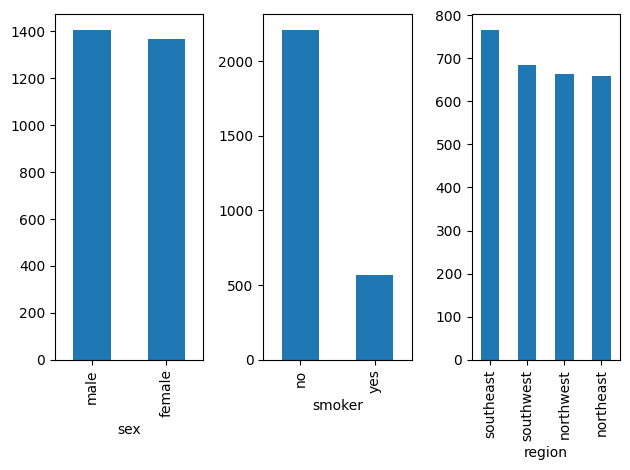

In [7]:
for i, column in enumerate(['sex','smoker','region'], 1):
    plt.subplot(1, 3, i)
    ins[column].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

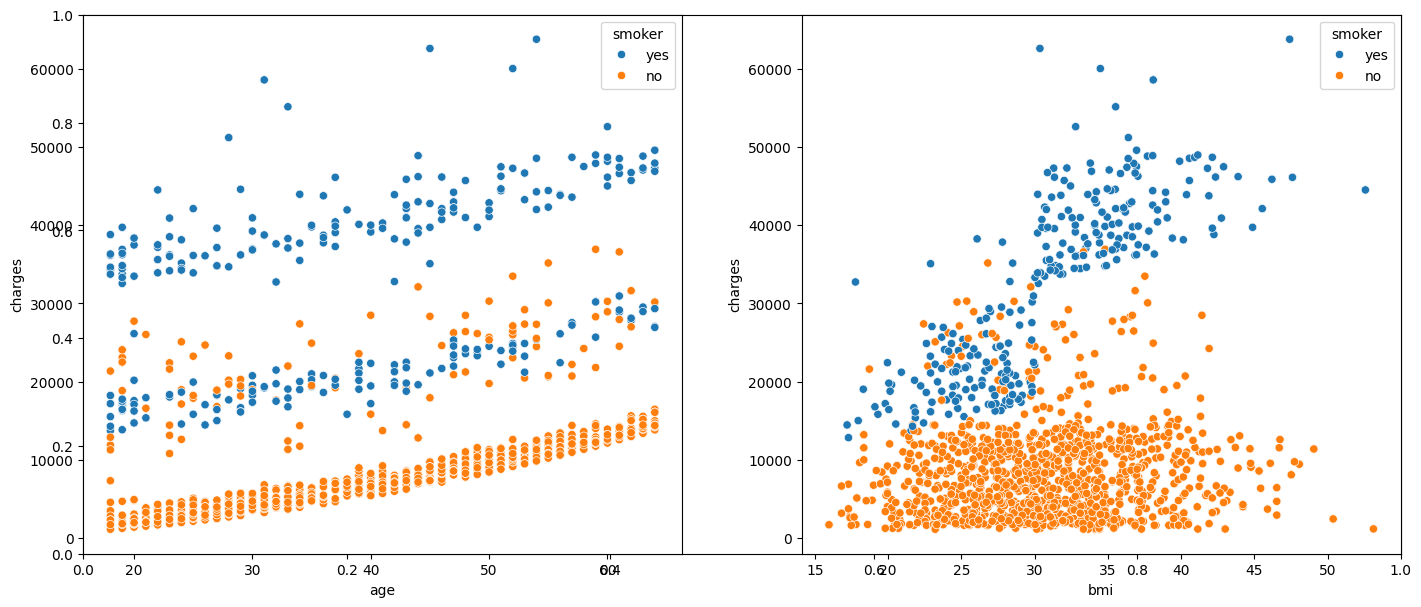

In [8]:

features = ['age', 'bmi']
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=ins, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

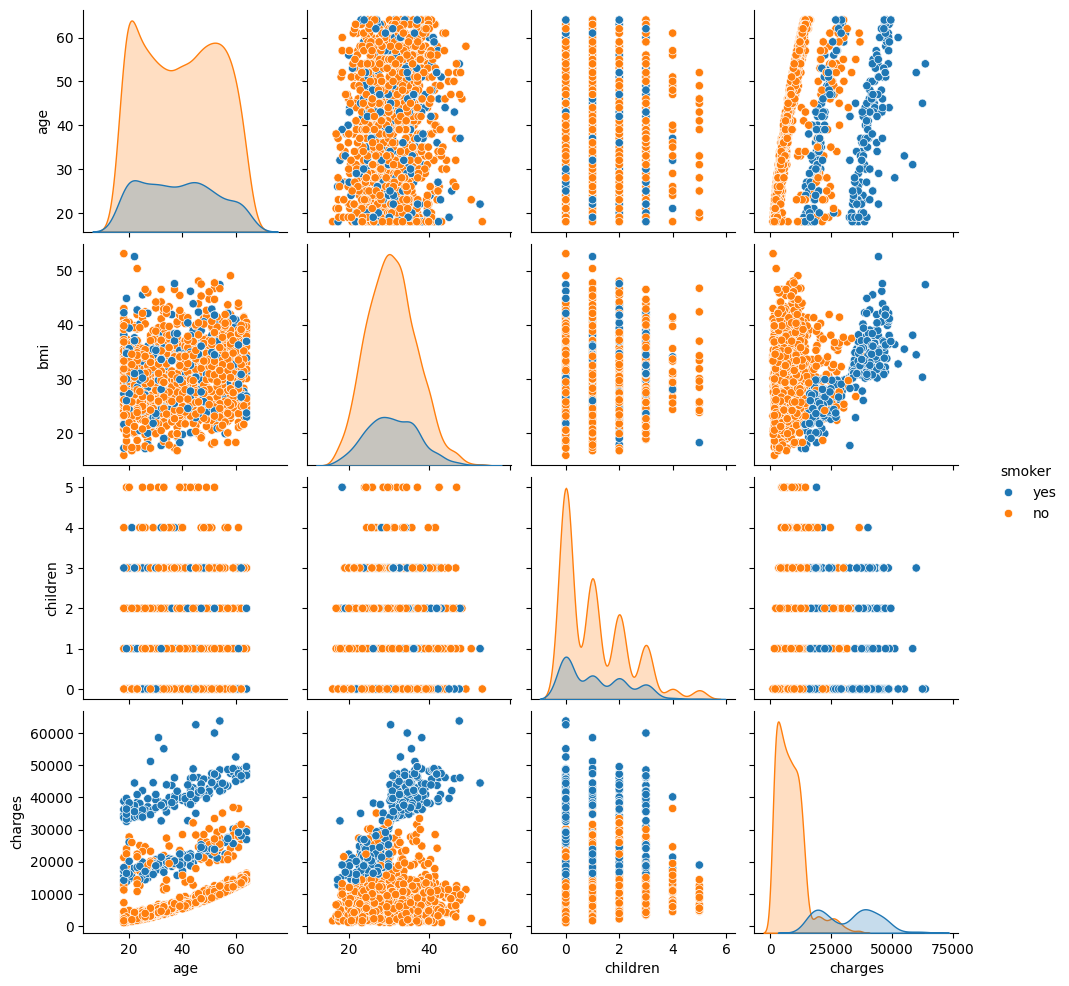

In [9]:
sns.pairplot(ins, hue='smoker')

<Axes: xlabel='charges', ylabel='Proportion'>

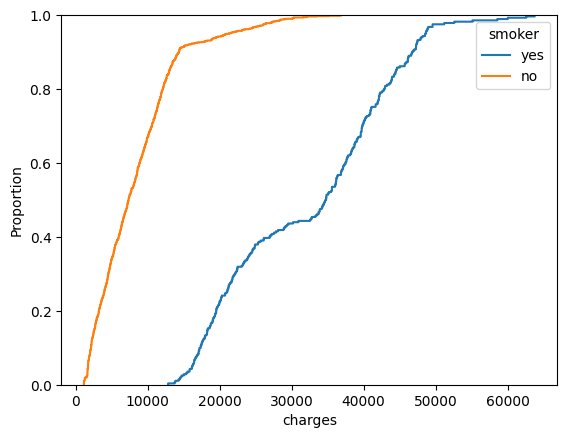

In [10]:
sns.ecdfplot(data=ins, x='charges', hue='smoker')


In [11]:
ins['smoker'].value_counts()

smoker
no     2208
yes     564
Name: count, dtype: int64

In [12]:
ins.groupby('smoker')['charges'].mean()

smoker
no      8417.874411
yes    32223.139764
Name: charges, dtype: float64

## Data Preprocessing

### Outlier Detection

<Axes: ylabel='age'>

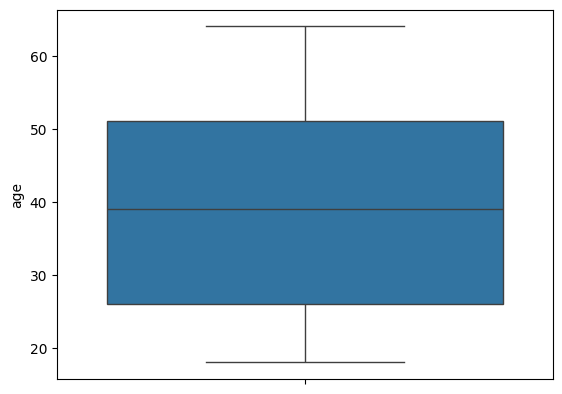

In [13]:
sns.boxplot(ins['age'])

<Axes: ylabel='bmi'>

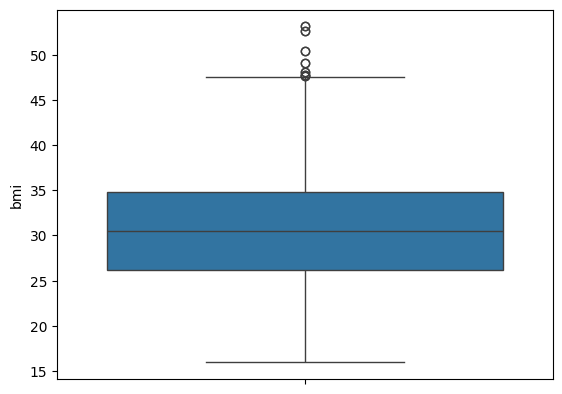

In [14]:
sns.boxplot(ins['bmi'])

<Axes: xlabel='bmi', ylabel='Density'>

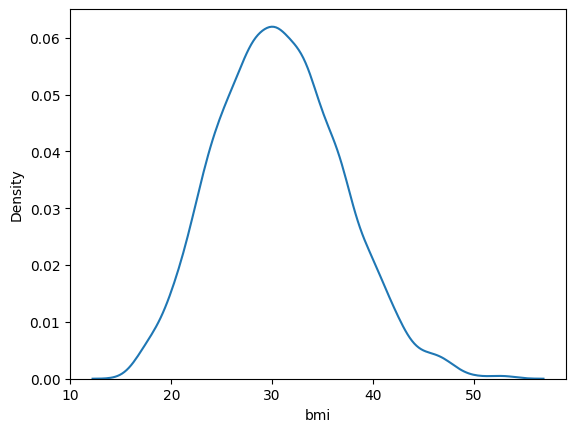

In [15]:
sns.kdeplot(ins['bmi'])

In [16]:
ins['bmi'].skew()

np.float64(0.27994423304168925)

### Removing Outliers

In [17]:
Q1 = ins['bmi'].quantile(0.25)
Q3 = ins['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lowerbound',lower_bound )
print('upperbound',upper_bound)

lowerbound 13.394999999999992
upperbound 47.59500000000001


In [18]:
new_ins = ins[(ins['bmi'] >= lower_bound) & (ins['bmi'] <= upper_bound)]
new_ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [19]:
ins['bmi'] = np.where(ins['bmi'] > upper_bound, upper_bound,np.where(ins['bmi'] < lower_bound, lower_bound, ins['bmi']))
ins['bmi'].describe()

count    2772.000000
mean       30.690242
std         6.094852
min        15.960000
25%        26.220000
50%        30.447500
75%        34.770000
max        47.595000
Name: bmi, dtype: float64

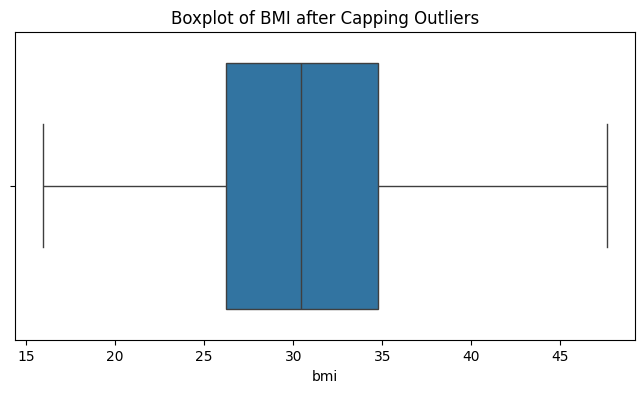

In [20]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=ins['bmi'])
plt.title('Boxplot of BMI after Capping Outliers')
plt.show()

## Encoding

In [21]:
ins['sex']=ins['sex'].map({'male':0,'female':1})
ins['smoker']=ins['smoker'].map({'yes':1,'no':0})
ins['region']=ins['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

#### Correlation

In [22]:
ins.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.026046,0.115491,0.037574,-0.023286,0.003403,0.298624
sex,0.026046,1.000000,-0.041485,-0.016020,-0.082326,-0.012008,-0.062837
bmi,0.115491,-0.041485,1.000000,-0.000713,0.011008,0.159935,0.200457
children,0.037574,-0.016020,-0.000713,1.000000,0.006362,-0.004177,0.066442
smoker,-0.023286,-0.082326,0.011008,0.006362,1.000000,0.008845,0.788783
region,0.003403,-0.012008,0.159935,-0.004177,0.008845,1.000000,0.004525
charges,0.298624,-0.062837,0.200457,0.066442,0.788783,0.004525,1.000000


<Axes: >

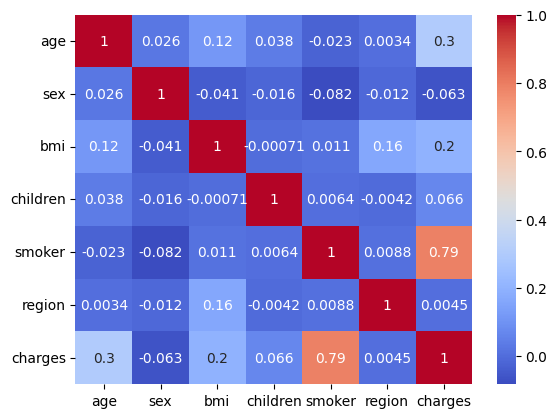

In [23]:
sns.heatmap(ins.corr(), annot=True, cmap='coolwarm')

In [24]:
X=ins.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
2767,47,1,45.320,1,0,2
2768,21,1,34.600,0,0,3
2769,19,0,26.030,1,1,0
2770,23,0,18.715,0,0,0


In [25]:
Y = ins.iloc[:,-1] 
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

## Model Training and Development

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

### Using LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# Train
lrmodel=LinearRegression()
lrmodel.fit(X_train,Y_train)
# Prediction
ypredtrain1=lrmodel.predict(X_train)
ypredtest1=lrmodel.predict(X_test)

In [28]:
#Evaluation
print("Train R²:",lrmodel.score(X_train,Y_train))
print("Test R²:",lrmodel.score(X_test,Y_test))
print("CV Score (Train):",cross_val_score(lrmodel,X,Y,cv=5,).mean())

Train R²: 0.7403764448926584
Test R²: 0.7710715810279711
CV Score (Train): 0.7495229803121546


### Using SVR

In [29]:
#SVR
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Train SVR
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train_scaled, Y_train)
# Predictions
y_train_pred = svr_model.predict(X_train_scaled)
y_test_pred = svr_model.predict(X_test_scaled)

In [31]:
# Evaluation
print("Train R²:", r2_score(Y_train, y_train_pred))
print("Test R²:", r2_score(Y_test, y_test_pred))
print("CV Score (Train):", cross_val_score(svr_model, X_train_scaled, Y_train, cv=5).mean())

Train R²: -0.09068258667820794
Test R²: -0.05842723167990882
CV Score (Train): -0.09562729497168738


### Using RandomForestRegressor

In [32]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid=param_grid = {
    'n_estimators': [50, 100, 120, 150, 170],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 170}


In [33]:
#Train RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=42,n_estimators=170,min_samples_split=2,max_depth=20,max_features='sqrt')
rfmodel.fit(X_train,Y_train)

#Predictions
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)

In [34]:
#Evaluation
print("Train R²:",r2_score(Y_train,ypredtrain2))
print("Test R²:",r2_score(Y_test,ypredtest2))
print("CV Score (Train):",cross_val_score(rfmodel,X,Y,cv=5).mean()) 

Train R²: 0.9900128657400045
Test R²: 0.955697038134505
CV Score (Train): 0.9788419382430208


### Using GradientBoostingRegressor

In [35]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],
            'learning_rate':[0.1,0.19,0.2,0.21,0.8,1],
            'max_depth': [3, 4, 8, 9],
            'min_samples_split': [2, 5, 10]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'learning_rate': 0.19, 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 50}


In [36]:
#Train GradientBoostingRegressor
gbmodel=GradientBoostingRegressor(n_estimators=50,learning_rate=0.19,max_depth=8,min_samples_split=2)
gbmodel.fit(X_train,Y_train)

#predictions
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)

In [37]:
#Evaluations
print("Train R²:",r2_score(Y_train,ypredtrain3))
print("Test R²:",r2_score(Y_test,ypredtest3))
print("CV Score (Train):",cross_val_score(gbmodel,X,Y,cv=5,).mean())

Train R²: 0.996009139532261
Test R²: 0.9567521692584805
CV Score (Train): 0.9929915052122045


### Using XGBRegressor

In [38]:
# XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,45,85,120,156,218,254,278],'max_depth':[2,3,4,5],'gamma':[0,0.1,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 5, 'n_estimators': 254}


In [39]:
#Train
xgmodel=XGBRegressor(n_estimators=254,max_depth=5,gamma=0)
xgmodel.fit(X_train,Y_train)

#Prediction
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)

In [40]:
#Evaluation
print("Train R²:",r2_score(Y_train,ypredtrain4))
print("Test R²:",r2_score(Y_test,ypredtest4))
print("CV Score (Train):",cross_val_score(xgmodel,X,Y,cv=5).mean())

Train R²: 0.9966137179677028
Test R²: 0.9618021649016097
CV Score (Train): 0.993110049422463


### Conclusion from Different models
##### Linear Regression gives a cv score 0.7495229803121546
##### SVR gives a cv score -0.09562729497168738
##### Random Forest Regressor gives a cv score 0.9788419382430208
##### Gradient Boosting Regressor gives a cv score 0.9929915052122045
##### XGB regrssor gives a cv score  0.993110049422463
##### Hence we will train using XGB Regressor

### Feature Importance

In [41]:
xgmodel.feature_importances_

array([0.01798063, 0.00477207, 0.02285242, 0.00972443, 0.9370286 ,
       0.00764188], dtype=float32)

In [42]:
feats=pd.DataFrame(data=xgmodel.feature_importances_,index=X.columns,columns=['Importance'])
feats

,Importance
age,0.017981
sex,0.004772
bmi,0.022852
children,0.009724
smoker,0.937029
region,0.007642


In [43]:
important_features=feats[feats['Importance']>0.009]
important_features

,Importance
age,0.017981
bmi,0.022852
children,0.009724
smoker,0.937029


In [44]:
ins.drop(['sex', 'region'], axis=1, inplace=True)

In [45]:
print(ins.columns.tolist())

['age', 'bmi', 'children', 'smoker', 'charges']


In [46]:
Xf=ins.iloc[:,:-1]
Xf

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0
...,...,...,...,...
2767,47,45.320,1,0
2768,21,34.600,0,0
2769,19,26.030,1,1
2770,23,18.715,0,0


In [47]:
Yf=ins.iloc[:,-1] 
Yf

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

## Final Model

In [48]:
# Final model
from sklearn.model_selection import train_test_split
Xf_train,Xf_test,Yf_train,Yf_test=train_test_split(Xf,Yf,test_size=0.3,random_state=0)
estimator=XGBRegressor()
#GridSearchCV
param_grid={'n_estimators':[12,13,115,120,140,150,250,280,292,295],'max_depth':[3,4,5],'gamma':[0,0.1,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(Xf_train,Yf_train)
print(grid.best_params_)
#Train
xgmodelfinal=XGBRegressor(n_estimators=292,max_depth=5,gamma=0)
xgmodelfinal.fit(Xf_train,Yf_train)
#Prediction
ypredtrainfinal=xgmodelfinal.predict(Xf_train)
ypredtestfinal=xgmodelfinal.predict(Xf_test)
#Evaluation
print("Train R²:",r2_score(Yf_train,ypredtrainfinal))
print("Test R²:",r2_score(Yf_test,ypredtestfinal))
print("CV Score (Train):",cross_val_score(xgmodelfinal,Xf,Yf,cv=5).mean())

{'gamma': 0, 'max_depth': 5, 'n_estimators': 292}
Train R²: 0.9955084832673196
Test R²: 0.9582320966298405
CV Score (Train): 0.9920946106299


In [49]:
from pickle import dump
dump(xgmodelfinal,open('insurancemodelf.pkl','wb'))

## Prediction

In [50]:
new_data=pd.DataFrame({'age':18,'sex':'male','bmi':33.77,'children':1,'smoker':'no','region':'southeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
xgmodelfinal.predict(new_data)

array([1768.4625], dtype=float32)